In [1]:
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import folium 
import matplotlib.pyplot as plt
import platform
from datetime import datetime
import warnings
import os
import glob
warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = 'AppleGothic'  # 사용할 한글 폰트 설정

# 1. 데이터 불러오기


In [ ]:
cus = pd.read_csv('./Data-in/customer_master.csv') # 고객데이터, 이름 성별
item = pd.read_csv('./Data-in/item_master.csv') # 취급하는 상품 데이터, 상품명, 가격 등
tran1 = pd.read_csv('./Data-in/transaction_1.csv') # 구매내역 데이터
tran2 = pd.read_csv('./Data-in/transaction_2.csv') # 구매내역 데이터와 연결된 구매내역 분할 데이터 
detail1 = pd.read_csv('./Data-in/transaction_detail_1.csv') # 구매내역 상세 데이터
detail2 = pd.read_csv('./Data-in/transaction_detail_2.csv') # 구매내역 상세 데이터와 연결된 분할 데이터

# 2. 데이터 결합(유니언)


In [39]:
transaction = pd.concat([ tran1, tran2,], axis=0)
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


# 3. 매출 데이터들끼리 결합 (조인하기)


In [41]:
detail = pd.concat([detail1, detail2], axis=0, ignore_index=True)

In [47]:
detail.set_index('detail_id')

,transaction_id,item_id,quantity
detail_id,,,
0,T0000000113,S005,1
1,T0000000114,S001,1
2,T0000000115,S003,1
3,T0000000116,S005,1
4,T0000000117,S002,2
...,...,...,...
7139,T0000006894,S004,1
7140,T0000006895,S002,1
7141,T0000006896,S001,2


#### 구매데이터와(transaction) 구매 상세데이터(detail) 결합

In [64]:
join_data = pd.merge(detail, transaction[["transaction_id", \
    "payment_date", "customer_id"]],
                    on="transaction_id", how="left")
join_data.head()



,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [65]:
# join_data = pd.merge(detail, transaction['customer_id','transaction_id','payment_date'],  how = 'left',on = 'transaction_id')
# join_data.head(3)

# 마스터데이터를 결합(조인) 하기

In [68]:
join_data = pd.merge(join_data, cus, on = 'customer_id',how='left')
join_data = pd.merge(join_data, item, on='item_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### 5. 필요한 데이터 컬럼 만들기

In [75]:
# price 필드 추가
join_data['price'] = join_data['quantity']*join_data['item_price']
join_data[['quantity','item_price','price']].head(10)

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000
5,1,120000,120000
6,1,180000,180000
7,1,50000,50000
8,1,210000,210000
9,1,85000,85000


### 6. 데이터 검산

In [77]:
join_data['price'].sum() == transaction['price'].sum()

True

### 7. 각종 통계량을 파악

In [83]:
# 결손치의 개수 파악
join_data.isna().sum()


detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [84]:
# 데이터 통계치 확인
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [98]:
# 구입일 : payment_date에서 연월을 추출 후 새로운 컬럼 추가
# 연월 단위로 price를 집합

In [106]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])

In [123]:
join_data['month_year'] = join_data['payment_date'].dt.strftime('%Y%m')
#join_data['Year'] = join_data['payment_date'].dt.strftime('%Y')

In [124]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,month,Year,month_year
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,02,2019,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,02,2019,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,02,2019,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,02,2019,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,02,2019,201902


In [129]:
join_data[['Year','month','price']].groupby(['Year','month']).sum().sort_values(by = 'price', ascending= False)

price
Year month           
2019 07     170620000
     06     164030000
     04     160510000
     03     160370000
     02     160185000
     05     155420000

### 9. 월별 상품별 데이터를 집계

In [140]:
# 월별 상품별로 매출의 합계, 수량을 표시
join = join_data.groupby(['month_year','item_name'])[['price','quantity']].sum().copy()

In [135]:
# 결과 : 매출의 합계는 PC-E가 가장높음, 수량은 값이 싼 PC-A가 높음
# 상품별 5월 PC-B, PC=D가 증가, 큰 매출을 차지하는 PC-E의 매출이 감소
# 6월 7월은 PC-E의 매출이 크게 상승
pd.pivot_table(join_data, index = 'item_name', columns = 'month_year', \
               values = ['price','quantity'], aggfunc = 'sum')

price                                                    \
month_year    201902    201903    201904    201905    201906    201907   
item_name                                                                
PC-A        24150000  26000000  25900000  24850000  26000000  25250000   
PC-B        25245000  25500000  23460000  25330000  23970000  28220000   
PC-C        19800000  19080000  21960000  20520000  21840000  19440000   
PC-D        31140000  25740000  24300000  25920000  28800000  26100000   
PC-E        59850000  64050000  64890000  58800000  63420000  71610000   

           quantity                                     
month_year   201902 201903 201904 201905 201906 201907  
item_name                                               
PC-A            483    520    518    497    520    505  
PC-B            297    300    276    298    282    332  
PC-C            165    159    183    171    182    162  
PC-D            173    143    135    144    160    145  
PC-E            285    305    309    280    302    341

In [136]:
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,month,Year,month_year
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,02,2019,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,02,2019,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,02,2019,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,02,2019,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,02,2019,201902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000,180000,07,2019,201907
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000,85000,07,2019,201907
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000,100000,07,2019,201907
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000,85000,07,2019,201907


In [141]:
join

price  quantity
month_year item_name                    
201902     PC-A       24150000       483
           PC-B       25245000       297
           PC-C       19800000       165
           PC-D       31140000       173
           PC-E       59850000       285
201903     PC-A       26000000       520
           PC-B       25500000       300
           PC-C       19080000       159
           PC-D       25740000       143
           PC-E       64050000       305
201904     PC-A       25900000       518
           PC-B       23460000       276
           PC-C       21960000       183
           PC-D       24300000       135
           PC-E       64890000       309
201905     PC-A       24850000       497
           PC-B       25330000       298
           PC-C       20520000       171
           PC-D       25920000       144
           PC-E       58800000       280
201906     PC-A       26000000       520
           PC-B       23970000       282
           PC-C       21840000       182
           PC-D       28800000       160
           PC-E       63420000       302
201907     PC-A       25250000       505
           PC-B       28220000       332
           PC-C       19440000       162
           PC-D       26100000       145
           PC-E       71610000       341

<Axes: xlabel='month_year', ylabel='price'>

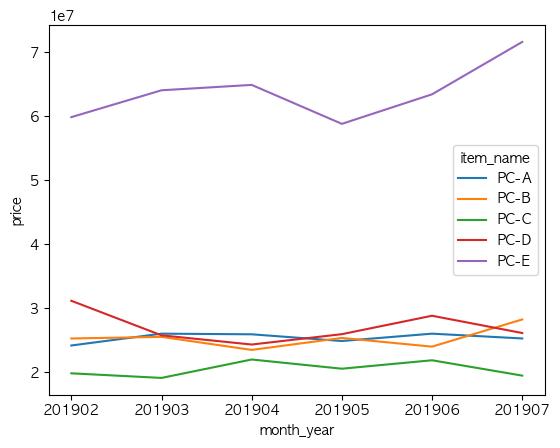

In [142]:
sns.lineplot(data=join, x = 'month_year', y = 'price', hue ='item_name')

### 10. 상품별 매출 추이를 가시화

In [144]:
graph_data = pd.pivot_table(join_data, index = 'month_year',\
                            columns = 'item_name', values = 'price', aggfunc = 'sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
month_year,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


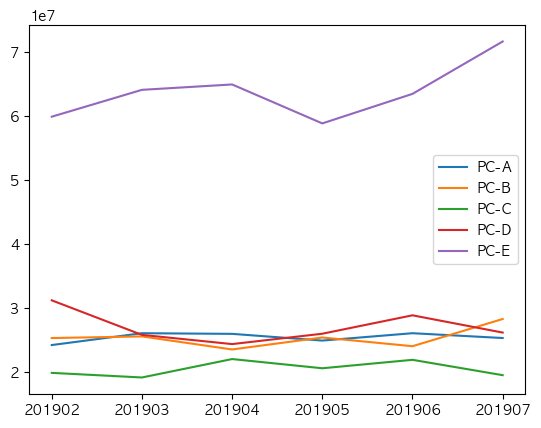

In [150]:
plt.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label = 'PC-E')
plt.legend()